In [99]:
import pandas as pd
import numpy as np
import yfinance as yf
import pytrade
import matplotlib.pyplot as plt
import datetime

pd.options.display.float_format = '{:,.3f}'.format

In [100]:
%%time
raw = pytrade.get_data(reload = True)
ratios = pytrade.calculate_ratio(raw)
output = pytrade.analysis_1.run(ratios)
output.sort_values(by="short_term_metric",ascending=False,inplace=True)
my_shortterm = output.loc[["DG","MELI","DXCM","AMD","JD","MSFT"]]
my_longterm = output.loc[["AMGN","AAPL","UNH","NLOK","WMT","OKE","INTC","KLAC","REGN"]]
shortterm_portfolio = pytrade.Portfolio.load("st_portfolio", raw)
longterm_portfolio = pytrade.Portfolio.load("lt_portfolio", raw)
output

[*********************100%***********************]  537 of 537 completed
Wall time: 1min 32s


,latest,three_wk_high,three_wk_low,three_m_high,three_m_low,one_yr_high,one_yr_low,three_wk_range,three_m_range,one_yr_range,short_term_stochastic,long_term_stochastic,st_potential,lt_potential,short_term_metric,long_term_metric
JD,62.610,69.609,62.510,69.609,47.616,69.609,29.930,0.014,0.682,0.824,0.810,0.142,0.112,0.112,1.000,0.344
ABBV,97.410,102.390,97.410,102.805,90.824,102.805,67.206,0.000,0.550,0.848,0.848,0.299,0.050,0.055,0.934,0.399
AVGO,314.340,332.233,314.340,332.770,291.768,332.770,221.916,0.000,0.551,0.834,0.834,0.283,0.057,0.059,0.930,0.389
MCHP,106.690,111.141,106.690,113.472,88.721,113.472,75.813,0.000,0.726,0.820,0.820,0.094,0.039,0.064,0.886,0.209
QCOM,92.310,96.363,92.310,96.363,83.332,96.736,74.681,0.000,0.689,0.799,0.799,0.110,0.043,0.038,0.873,0.179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UA,9.440,9.440,8.567,10.966,7.860,26.298,7.860,1.000,0.509,0.086,-0.914,-0.423,-0.089,-0.167,-1.066,-0.726
UAA,10.490,10.494,9.486,12.320,8.703,29.648,8.703,0.996,0.494,0.085,-0.910,-0.409,-0.092,-0.170,-1.067,-0.717
CXO,54.430,54.430,49.148,72.887,49.148,109.524,48.729,1.000,0.223,0.094,-0.906,-0.129,-0.096,-0.092,-1.070,-0.295
FTI,8.035,8.035,7.037,10.272,7.037,29.701,6.665,1.000,0.308,0.059,-0.941,-0.249,-0.122,-0.117,-1.148,-0.460


In [96]:
output.sort_values(by="long_term_metric",ascending=False,inplace=True)
output

,latest,three_wk_high,three_wk_low,three_m_high,three_m_low,one_yr_high,one_yr_low,three_wk_range,three_m_range,one_yr_range,short_term_stochastic,long_term_stochastic,st_potential,lt_potential,short_term_metric,long_term_metric
NLOK,20.170,20.916,20.170,24.565,20.170,24.690,13.106,0.000,0.000,0.610,0.610,0.610,0.024,0.214,0.648,1.000
COG,18.690,18.797,17.668,24.998,17.668,25.094,14.176,0.905,0.139,0.413,-0.492,0.274,-0.033,0.327,-0.544,0.870
SBAC,296.065,319.303,296.065,357.867,296.065,360.011,232.380,0.000,0.000,0.499,0.499,0.499,0.048,0.202,0.574,0.867
TGT,120.580,126.497,120.491,137.869,120.491,140.572,88.715,0.015,0.005,0.614,0.600,0.609,0.034,0.132,0.653,0.850
HUM,399.280,410.927,391.766,453.969,391.766,453.969,279.390,0.392,0.121,0.687,0.295,0.566,0.016,0.137,0.319,0.816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TT,105.290,105.290,93.258,105.290,86.965,143.935,86.965,1.000,1.000,0.322,-0.678,-0.678,-0.098,-0.174,-0.832,-0.996
VIAC,24.800,25.932,22.927,25.932,17.083,42.417,16.333,0.623,0.872,0.325,-0.299,-0.547,-0.041,-0.296,-0.363,-1.086
LB,19.210,19.210,15.751,19.535,11.885,27.246,11.885,1.000,0.958,0.477,-0.523,-0.481,-0.122,-0.381,-0.713,-1.176
ROP,420.200,420.200,400.308,426.758,352.754,426.758,352.754,1.000,0.911,0.911,-0.089,0.000,-0.006,nan,-0.098,nan


In [101]:
my_longterm

,latest,three_wk_high,three_wk_low,three_m_high,three_m_low,one_yr_high,one_yr_low,three_wk_range,three_m_range,one_yr_range,short_term_stochastic,long_term_stochastic,st_potential,lt_potential,short_term_metric,long_term_metric
AMGN,257.910,268.740,247.803,273.213,227.488,276.412,183.630,0.483,0.665,0.801,0.318,0.135,0.033,0.047,0.375,0.221
AAPL,388.000,395.797,378.915,395.797,316.046,395.797,218.767,0.538,0.902,0.956,0.418,0.054,0.020,0.020,0.452,0.090
UNH,305.190,314.286,297.835,333.039,297.835,345.735,232.800,0.447,0.209,0.641,0.194,0.432,0.012,0.072,0.215,0.563
NLOK,19.940,20.834,19.940,24.469,19.940,24.594,13.054,0.000,0.000,0.597,0.597,0.597,0.029,0.223,0.646,1.000
WMT,132.320,134.477,121.790,153.123,121.790,165.644,110.683,0.830,0.336,0.394,-0.436,0.058,-0.054,0.032,-0.529,0.115
OKE,29.970,34.902,27.023,48.410,27.023,78.200,20.208,0.374,0.138,0.168,-0.206,0.031,-0.063,0.035,-0.312,0.093
INTC,60.700,62.860,59.592,69.540,59.592,71.775,50.499,0.339,0.111,0.479,0.140,0.368,0.009,0.113,0.156,0.573
KLAC,203.510,210.387,197.906,210.387,172.083,210.387,141.913,0.449,0.820,0.900,0.451,0.079,0.034,0.034,0.508,0.140
REGN,638.860,663.693,634.942,677.083,571.947,677.083,300.742,0.136,0.636,0.898,0.762,0.262,0.037,0.060,0.825,0.370


In [102]:
my_shortterm

,latest,three_wk_high,three_wk_low,three_m_high,three_m_low,one_yr_high,one_yr_low,three_wk_range,three_m_range,one_yr_range,short_term_stochastic,long_term_stochastic,st_potential,lt_potential,short_term_metric,long_term_metric
DG,191.890,199.777,190.382,212.347,187.076,212.347,143.890,0.160,0.190,0.701,0.541,0.511,0.031,0.107,0.593,0.703
MELI,"1,018.900","1,059.324",969.029,"1,059.324",652.601,"1,059.324",511.282,0.552,0.901,0.926,0.374,0.026,0.040,0.040,0.442,0.097
DXCM,429.020,455.206,417.305,475.142,356.659,475.142,158.413,0.309,0.611,0.854,0.545,0.244,0.055,0.108,0.639,0.438
AMD,57.000,59.172,54.468,65.080,53.378,66.261,31.463,0.538,0.310,0.734,0.196,0.424,0.019,0.131,0.227,0.662
JD,62.610,69.609,62.510,69.609,47.616,69.609,29.930,0.014,0.682,0.824,0.810,0.142,0.112,0.112,1.000,0.344
MSFT,208.750,221.475,204.928,221.475,189.810,221.475,146.438,0.231,0.598,0.830,0.599,0.232,0.061,0.061,0.703,0.342


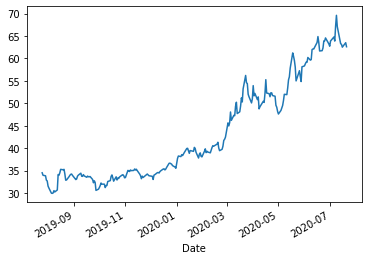

In [109]:
plt.close('all')
ratios["JD"].tail(250).plot()

In [103]:
longterm_portfolio.report()

Current Value = 13470.49
Buy Power = 0.0
------------------------------
NLOK: 297 @ 20.18 19.94
OKE: 183 @ 27.26 29.97
INTC: 34 @ 59.55 60.7


In [104]:
longterm_portfolio.market_current_value()

13312.469

In [105]:
shortterm_portfolio.report()

Current Value = 27346.49
Buy Power = 0.0
------------------------------
JD: 204 @ 63.223 62.61
MELI: 8 @ 945.05 1018.9
DG: 29 @ 189.85 191.89
DXCM: 2 @ 390.0 429.02


In [106]:
shortterm_portfolio.market_current_value()

26495.017

In [56]:
# shortterm_portfolio.deposit(7174.44, datetime.date(2020, 6, 22))
# shortterm_portfolio.buy("PKI", 73, 7174.44, datetime.date(2020, 6, 22))
# shortterm_portfolio.deposit(787.11, datetime.date(2020, 6, 23))
# shortterm_portfolio.buy("ZBRA", 3, 787.11, datetime.date(2020, 6, 23))
# shortterm_portfolio.deposit(7535.5, datetime.date(2020, 6, 24))
# shortterm_portfolio.buy("QRVO", 70, 7535.5, datetime.date(2020, 6, 24))
# shortterm_portfolio.deposit(5505.65, datetime.date(2020, 7, 2))
# shortterm_portfolio.buy("DG", 29, 5505.65, datetime.date(2020, 7, 2))
# shortterm_portfolio.sell("PKI", 73, 7311.52, datetime.date(2020, 7, 7))
# shortterm_portfolio.buy("BLK", 13, 7161.18, datetime.date(2020, 7, 7))
# shortterm_portfolio.sell("ZBRA", 3, 793, datetime.date(2020, 7, 14))
# shortterm_portfolio.buy("DXCM", 2, 780, datetime.date(2020, 7, 14))
# shortterm_portfolio.sell("BLK", 13, 7623.66, datetime.date(2020, 7, 17))
# shortterm_portfolio.buy("MELI", 8, 7560.4, datetime.date(2020, 7, 17))
# shortterm_portfolio.deposit(4117.35, datetime.date(2020, 7, 20))
# shortterm_portfolio.buy("JD", 69, 4343.95, datetime.date(2020, 7, 20))
# shortterm_portfolio.sell("QRVO", 70, 8273.12, datetime.date(2020, 7, 21))
# shortterm_portfolio.deposit(280.48, datetime.date(2020, 7, 21))
# shortterm_portfolio.buy("JD", 135, 8553.6, datetime.date(2020, 7, 21))

In [ ]:
# longterm_portfolio.deposit(2024.7, datetime.date(2020, 6, 22))
# longterm_portfolio.buy("INTC", 34, 2024.7, datetime.date(2020, 6, 22))
# longterm_portfolio.deposit(4988.58, datetime.date(2020, 7, 8))
# longterm_portfolio.buy("OKE", 183, 4988.58, datetime.date(2020, 7, 8))
# longterm_portfolio.deposit(5993.46, datetime.date(2020, 7, 16))
# longterm_portfolio.buy("NLOK", 297, 5993.46, datetime.date(2020, 7, 16))

In [107]:
print(shortterm_portfolio.calc_rate_of_return())
print(shortterm_portfolio.calc_market_rate_of_return("^IXIC"))
print(longterm_portfolio.calc_rate_of_return())
print(longterm_portfolio.calc_market_rate_of_return("^IXIC"))

3.498
2.331
2.927
2.175


In [57]:
shortterm_portfolio.save()
longterm_portfolio.save()

In [ ]:
df_dividends = {}

In [ ]:
f = open("./ticker.csv", "r")
tickers = f.read().split(",")

In [ ]:
%%time
f = open("./ticker.csv", "r")
tickers = f.read().split(",")
for t in tickers:
    stock = yf.Ticker(t)
    df_dividends[t] = stock.get_dividends()

In [ ]:
stock = yf.Ticker("MSFT")

In [ ]:
df_dividends

In [ ]:
stock = yf.download("AAPL")

In [ ]:
stock["Adj Close"][datetime.date(2014, 6, 5)]

In [ ]:
stock["Adj Close"][datetime.date.today()]

In [ ]:
a = yf.Ticker("AAPL")

In [ ]:
a.get_splits()

In [55]:
8273.12-8553.6

-280.47999999999956